# Stock Market Prediction Notebook


## Notebook Configs

### Importing libraries

In [ ]:
# General Libraries
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns 
import plotly.graph_objects as go
from termcolor import colored

# ML algorithms
from sklearn.model_selection import train_test_split 
from pandas.core.common import random_state

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNetCV

# Specific graph for decision tree
from sklearn.tree import plot_tree

# Error metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Technical Indicators
!pip install ta
from ta import add_all_ta_features
from ta.utils import dropna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Modifying chart parameters to better visualize the data


In [ ]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## 1. Frame The Problem

### Stock Market Prediction
The stock market is a chaotic and dynamic environment that moves investments in a network of connections that in turn move local and global economies, changing the way shareholders and stakeholders make decisions. </br>
Market fluctuations are complex and capable of altering the course of nations by manipulating the flow of investment capital. Keeping in mind the nature of the stock market, this notebook aims to predict the value of an stock using different machine learning algorithms. The variables used were "volume_adi" and "volume_obv", however, new variables may be implemented in the future, such as statistical indices, quarterly results.

### Information about the notebook
- The dataset was divided into training and testing parts in the ratio 80:20, that means 80% of the database will be used for training and 20% for testing.
- The attributes considered for the prediction were the 'volume_obv' and 'volume_adi' indicators. Because all data has been ordered in order of collection, datetime increases increasingly, so instead of using datetime as variable in prediction, the pandas library row index was used, which facilitates calculations in code and decreases execution time. 
- There was a need to pre-process the data, because:
  * The dataset contains an unnamed column, which works as an index, but the pandas library already generates an index automatically when using a dataset, so this column is unnecessary and has been discarded. 
  * The TwelveData platform sends the 5000 most recent data rows collected. the database starts with the last data collected and ends with the oldest 5000°, so it was necessary to reverse the order of the database.

- There was no need to delete data, because all rows contain all attributes, that is, there are no null values in the dataset.
- The metrics for evaluating the results were the coefficient of determination and the root of the mean quadratic error, commonly used to determine regression error.


## 2. Get the Data

**Dataset**: Bradesco Stocks: https://drive.google.com/file/d/1e0HUmU2TOZ83guxo5hz1inl1I1rCIMM9/view?usp=sharing <br/>
The dataset contains data that was collected through a Python request for the TwelveData platform API, which requested Bradesco's stock data for the most recent 5,000 rows by minute. <br/>
Each *observation (record/line)* consists of information about a stock, including the time it was collected, the price at which it opened and closed for purchase and sale (open and close), the lowest and highest price at which it was purchased or sold (low and high), the volume exchanged, and an index value.<br/>


In [ ]:
df = pd.read_csv("/content/sample_data/2022-06-02 stock data.csv")
df.head()

,Unnamed: 0,datetime,open,high,low,close,volume
0,0,2022-06-02 11:29:00,4.129,4.130,4.125,4.130,57553
1,1,2022-06-02 11:28:00,4.125,4.129,4.125,4.129,1201
2,2,2022-06-02 11:27:00,4.130,4.130,4.125,4.125,142369
3,3,2022-06-02 11:26:00,4.115,4.129,4.115,4.125,771185
4,4,2022-06-02 11:25:00,4.115,4.115,4.115,4.115,56256


## 3.  Explore the data

<h4> The dataset is composed of the attributes:</h4>

* Datetime: The time when the data was collected.
* Open: The value of the stock when it opened for buying and selling.
* Close: The value of the stock when it closed for buying and selling.
* High: The highest value the stock was sold while it was open for sale.
* Low: The lowest value the stock was sold while it was open for sale.
* Volume: The volume traded.


TwelveData sends the 5000 most recent rows of data that has been collected, that is, the database starts with the last data collected and ends with the oldest 5000°, so it is necessary to reverse the order of the database.

In [ ]:
df_ordenado = df.sort_values(by='datetime')

df_ordenado = df_ordenado.rename_axis('index').reset_index()
df = df_ordenado.drop('index', 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



### 3.1 Univariate Analysis
Univariate analysis seeks to understand the distribution of values for a single variable and will be performed using summerized statistics.

In [ ]:
stats = df.describe()
stats

,Unnamed: 0,open,high,low,close,volume
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,2499.500000,3.922025,3.925760,3.918613,3.922000,1.027525e+05
std,1443.520003,0.211858,0.211693,0.211941,0.211823,4.486239e+05
min,0.000000,3.510000,3.510000,3.500000,3.510000,0.000000e+00
25%,1249.750000,3.756775,3.760000,3.754500,3.757725,7.598750e+03
50%,2499.500000,3.925000,3.929900,3.920000,3.925000,3.154250e+04
75%,3749.250000,4.115000,4.120000,4.111100,4.115000,1.169082e+05
max,4999.000000,4.316400,4.320000,4.315000,4.320000,2.956320e+07


#### **Open**

In [ ]:
df['open'].describe()

count    5000.000000
mean        3.922025
std         0.211858
min         3.510000
25%         3.756775
50%         3.925000
75%         4.115000
max         4.316400
Name: open, dtype: float64

In [ ]:
print(f"The mean value when the stock was opened for sale is {stats.loc['mean', 'open']:.2f} +- {stats.loc['std', 'open']:.2f}")
print(f"The median of the values when the stock was opened is {stats.loc['50%', 'open']}")

The mean value when the stock was opened for sale is 3.92 +- 0.21
The median of the values when the stock was opened is 3.925


Note that the **mean** and **median** do not have a big difference and the **standard deviation** is not that high. All of this indicates (in numbers) that the dispersion between the opening values is not so large.

#### **Close**

In [ ]:
df['close'].describe()

count    5000.000000
mean        3.922000
std         0.211823
min         3.510000
25%         3.757725
50%         3.925000
75%         4.115000
max         4.320000
Name: close, dtype: float64

In [ ]:
print(f"The mean value when the stock was closed for sale is {stats.loc['mean', 'close']:.2f} +- {stats.loc['std', 'close']:.2f}")
print(f"AThe median value when the stock was opened for sale is {stats.loc['50%', 'close']}")

The mean value when the stock was closed for sale is 3.92 +- 0.21
AThe median value when the stock was opened for sale is 3.925


Again, the **mean** and **median** don't have a big difference, the **standard deviation** is not that high and the dispersion between the closing values is not so large. </br>
It can also be observed that the variation between the opening and closing values of the stock is small, which makes their statistics similar.

#### **High**

In [ ]:
df['high'].describe()

count    5000.000000
mean        3.925760
std         0.211693
min         3.510000
25%         3.760000
50%         3.929900
75%         4.120000
max         4.320000
Name: high, dtype: float64

#### **Low**

In [ ]:
df['low'].describe()

count    5000.000000
mean        3.918613
std         0.211941
min         3.500000
25%         3.754500
50%         3.920000
75%         4.111100
max         4.315000
Name: low, dtype: float64

### 3.2 Time-based pricing visualization
Since the attributes of the dataset are not highly variable, it is sufficient to plot a single chart to visualize the behavior of the action over time, however, a graph for each attribute has been plotted out of curiosity.


#### **Open**

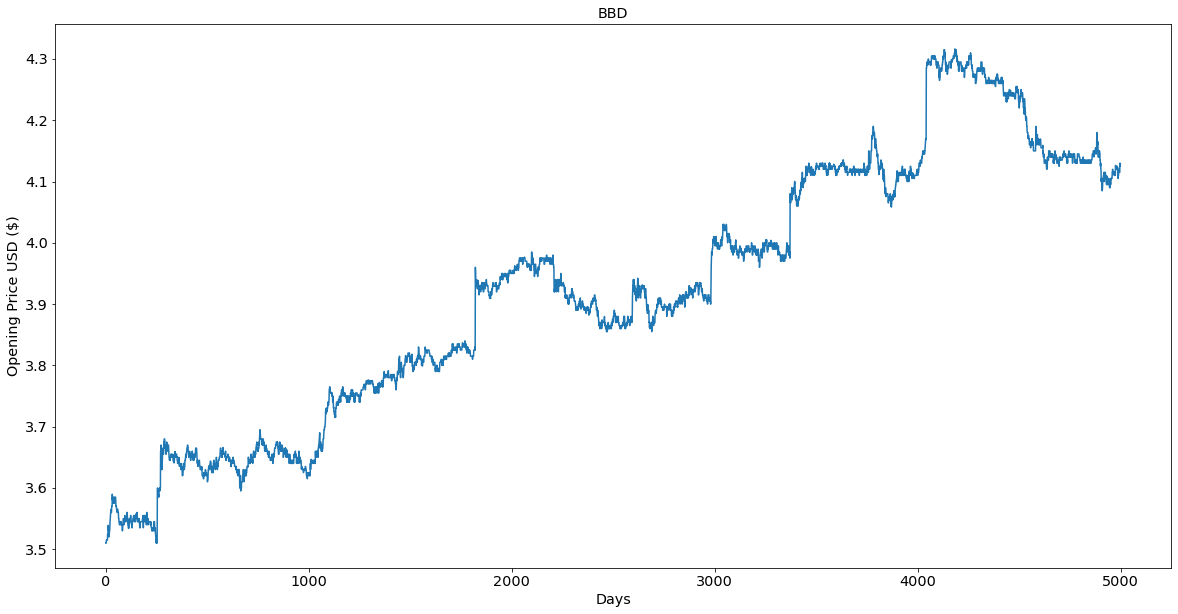

In [ ]:
plt.title('BBD')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['open'])
plt.show()

#### **Close**

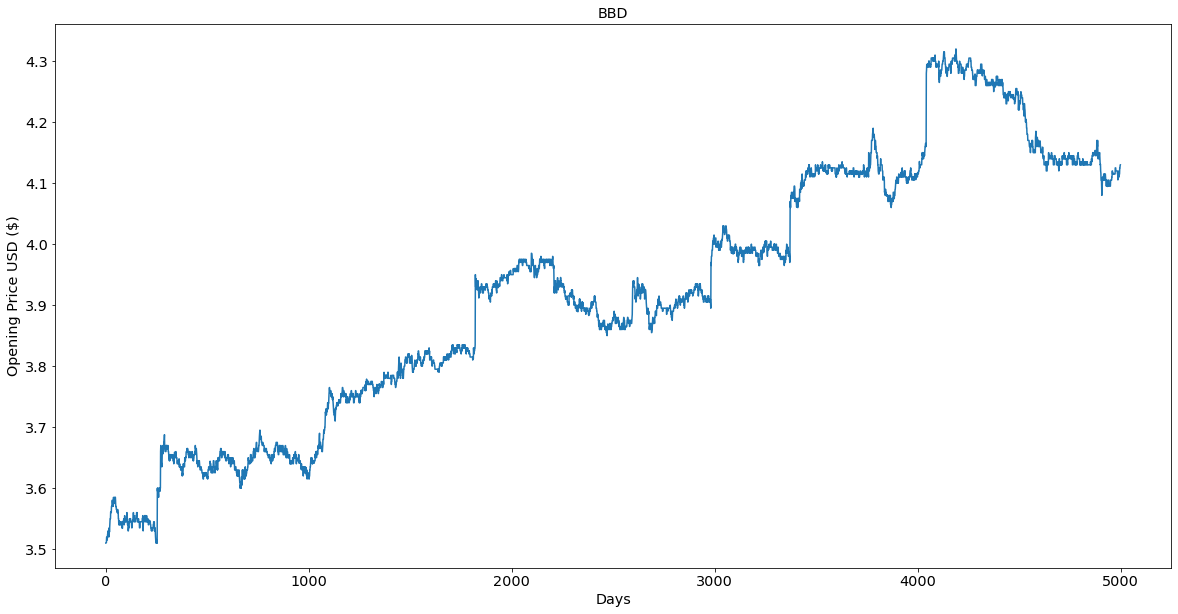

In [ ]:
plt.title('BBD')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['close'])
plt.show()

#### **High**

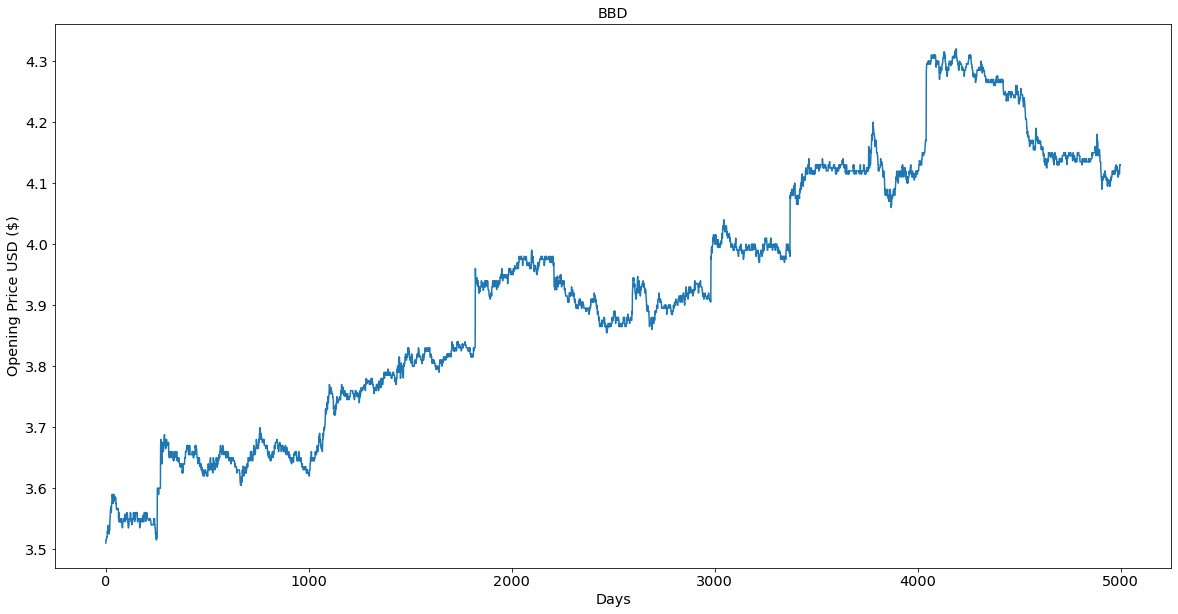

In [ ]:
plt.title('BBD')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['high'])
plt.show()

#### **Low**

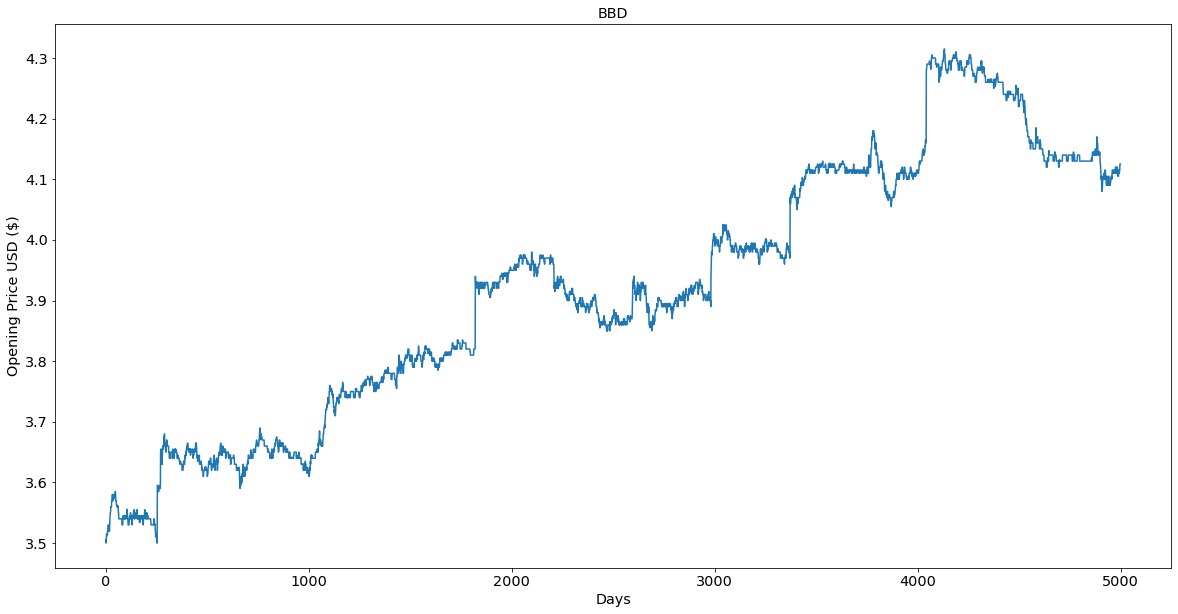

In [ ]:
plt.title('BBD')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['low'])
plt.show()

### Candlestick Visualization

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df['datetime'],
                open=df['open'], high=df['high'],
                low=df['low'], close=df['close'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

### Technical Indicators

In [ ]:
techIndicators_data = add_all_ta_features(df, open="open", high="high", low="low", close="close", volume="volume")

/usr/local/lib/python3.7/dist-packages/ta/trend.py:780: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/ta/trend.py:785: RuntimeWarning:

invalid value encountered in double_scalars



### Heatmap Correlation

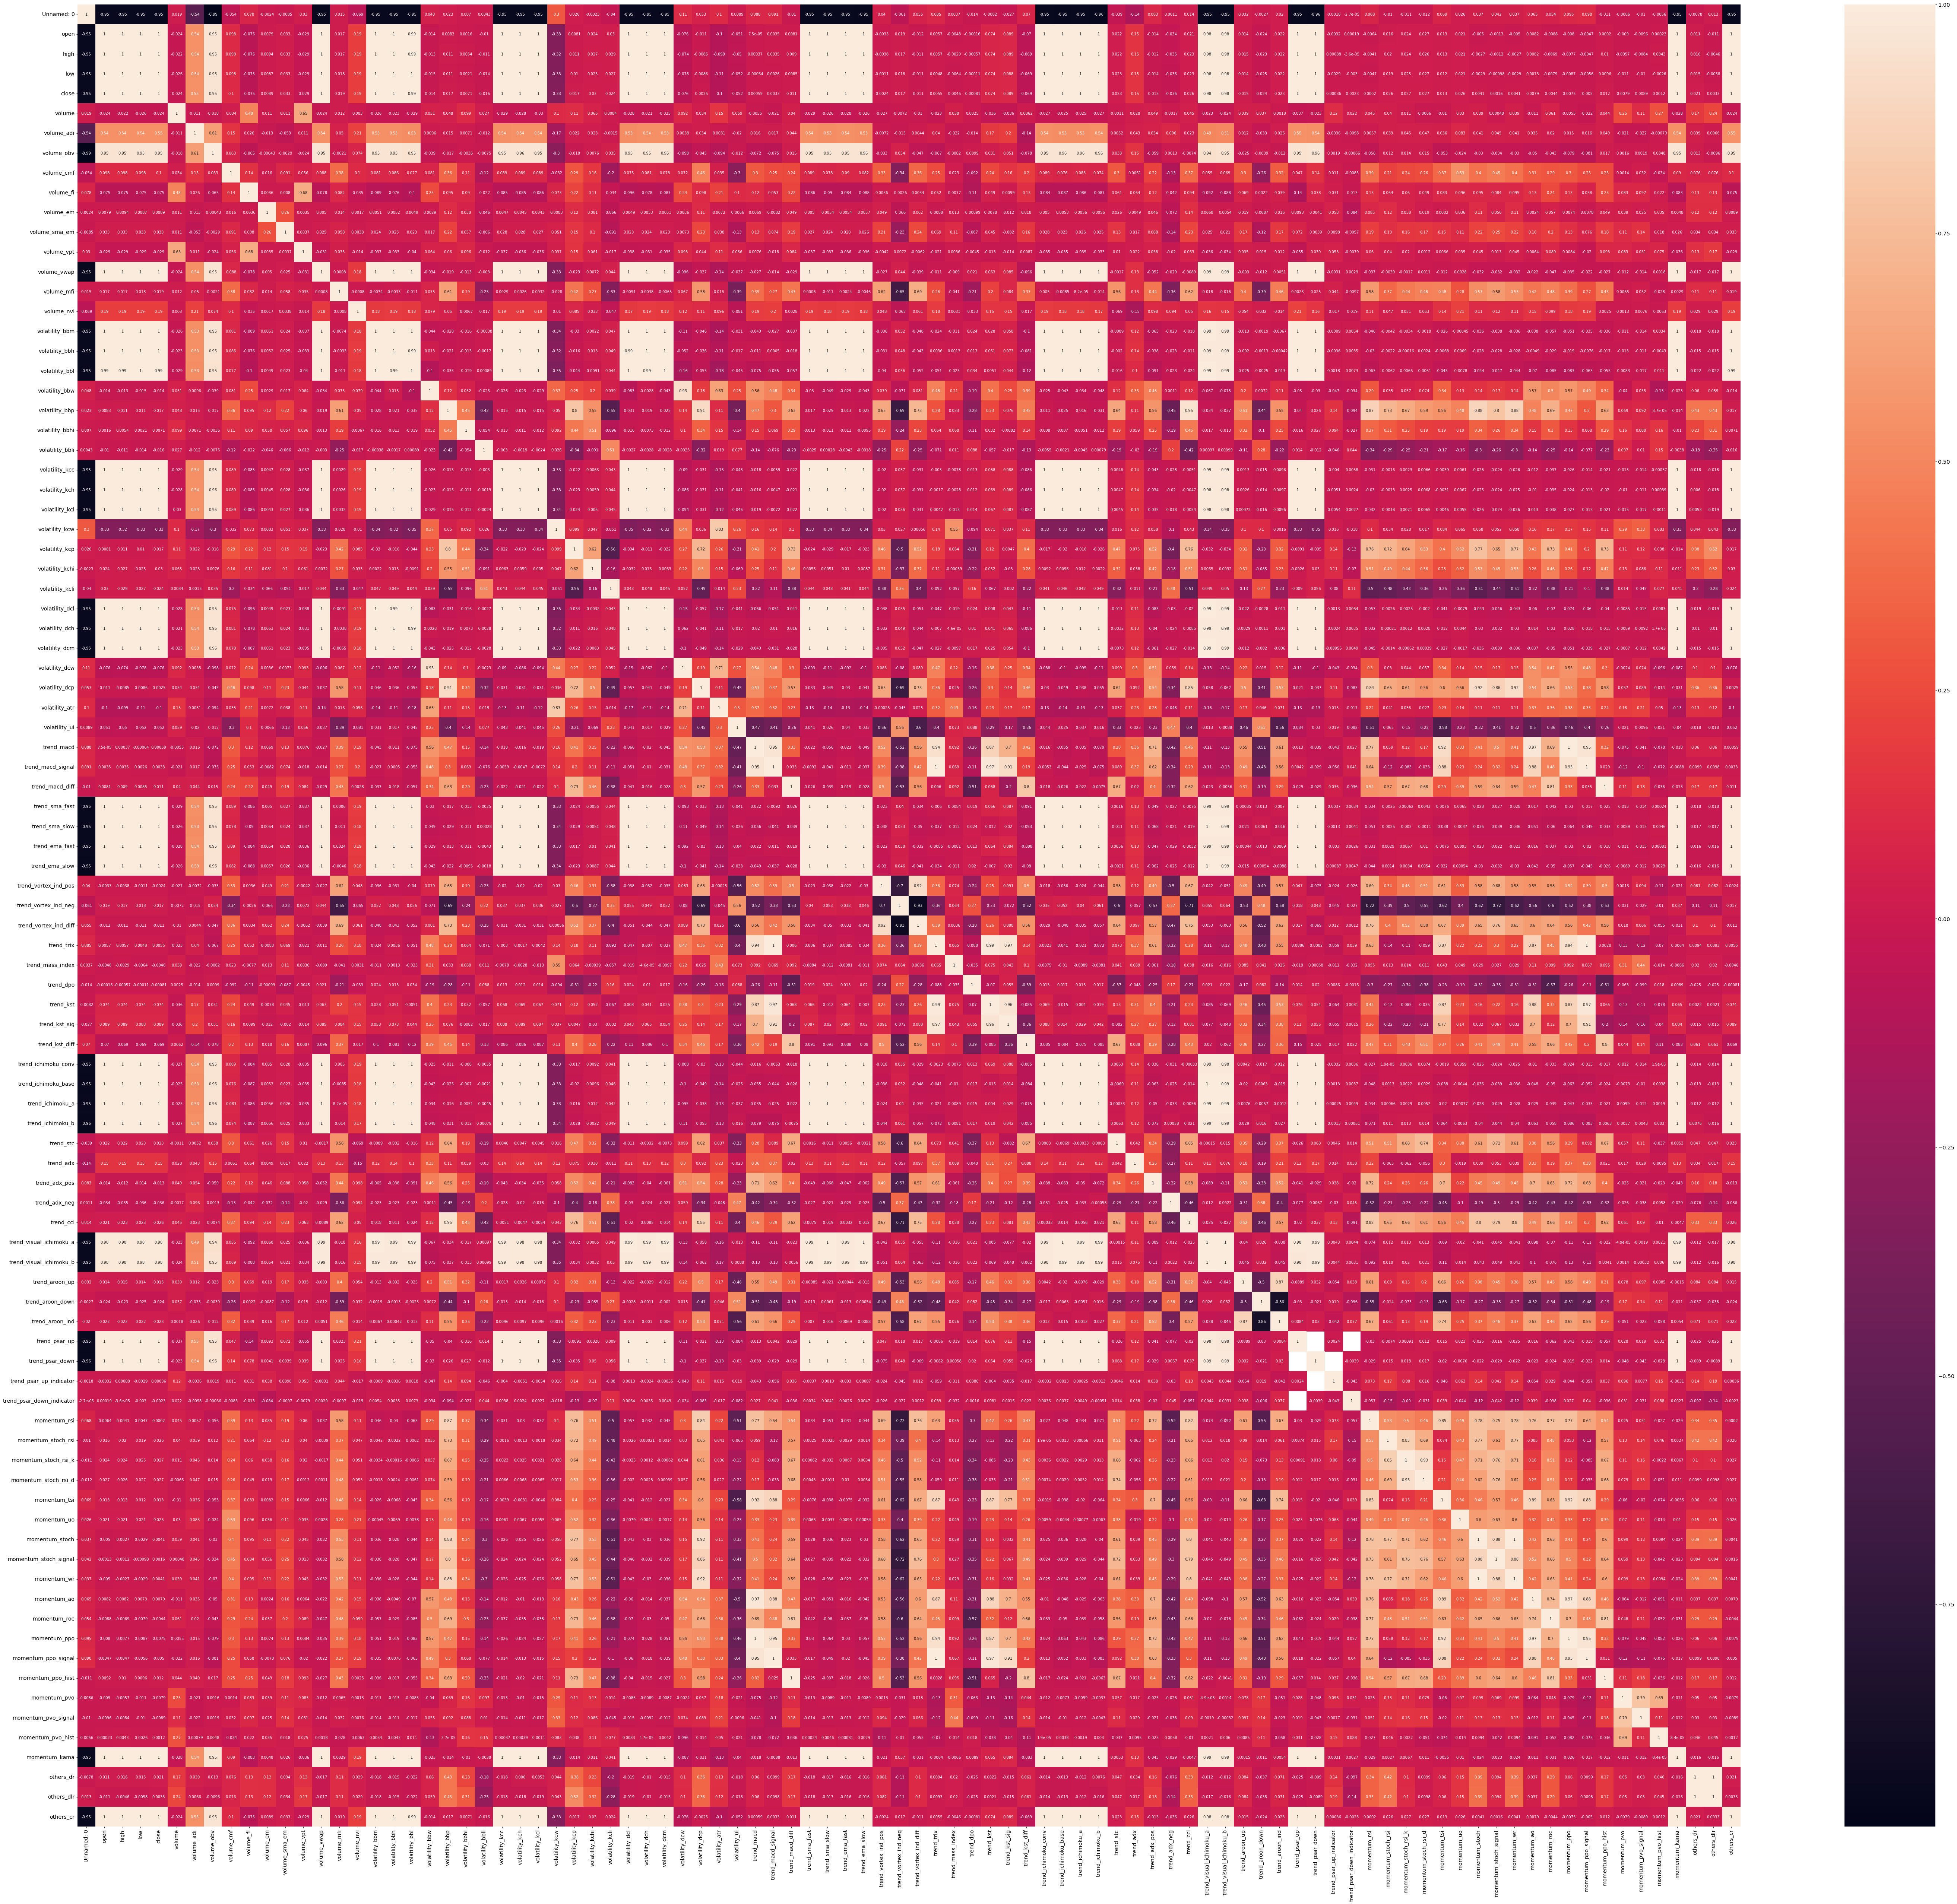

In [ ]:
import seaborn as sns
plt.figure(1 , figsize = (100 , 90))
cor = sns.heatmap(df.corr(), annot = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 93 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 5000 non-null   int64  
 1   datetime                   5000 non-null   object 
 2   open                       5000 non-null   float64
 3   high                       5000 non-null   float64
 4   low                        5000 non-null   float64
 5   close                      5000 non-null   float64
 6   volume                     5000 non-null   int64  
 7   volume_adi                 5000 non-null   float64
 8   volume_obv                 5000 non-null   int64  
 9   volume_cmf                 4981 non-null   float64
 10  volume_fi                  4987 non-null   float64
 11  volume_em                  4994 non-null   float64
 12  volume_sma_em              4818 non-null   float64
 13  volume_vpt                 5000 non-null   float

## 4. Data Cleaning

The index column that came with the dataset is unnecessary and it was deleted.</br>

In [ ]:
df.pop(df.columns[0])

0       4999
1       4998
2       4997
3       4996
4       4995
        ... 
4995       4
4996       3
4997       2
4998       1
4999       0
Name: Unnamed: 0, Length: 5000, dtype: int64

## 5. Prepare the data (Preprocessing)

In [ ]:
df['volume_obv'] = df['volume_obv'].astype(float)
df = df[['close', 'volume_obv','volume_adi']]
df.head()

,close,volume_obv,volume_adi
0,3.5100,122882.0,122882.000000
1,3.5100,622487.0,287181.630872
2,3.5105,783848.0,292386.824421
3,3.5110,799417.0,283045.424421
4,3.5195,820367.0,299805.424421


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   close       5000 non-null   float64
 1   volume_obv  5000 non-null   float64
 2   volume_adi  5000 non-null   float64
dtypes: float64(3)
memory usage: 117.3 KB


### Separating independent and dependent variables

Correlation with the close variable: </br> 
Volume_adi: 0.55 </br>
Volume_obv: 0.95  </br>
volume_cmf: 0.1</br>
volume_nvi: 0.19 </br>
trend_adx:  0.15 </br>
Since "volume_adi" and "volume_obv" have the highest correlation, they will be used as independent variables.

In [ ]:
indep_vars = ['volume_obv','volume_adi']
indep_vars

['volume_obv', 'volume_adi']

In [ ]:
x = df[indep_vars]

In [ ]:
y = df['close']

#### Separating the dataset into 20% for testing and 80% for training.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state = 100)

#### Checking training and test set sizes

In [ ]:
print(f"X_test.shape = {x_test.shape}")
print(f"y_test.shape = {y_test.shape}")

X_test.shape = (1000, 2)
y_test.shape = (1000,)


In [ ]:
print(f"X_train.shape = {x_train.shape}")
print(f"y_train.shape = {y_train.shape}")

X_train.shape = (4000, 2)
y_train.shape = (4000,)


##  6. Train ML (Machine Learning) Algorithms
As the values being predicted are quantitative, this is a regression problem, and in accordance with this, different regression algorithms will be used:

* Lasso Regression
* Support Vector Regression (SVR)
* ElasticNet Regression

<hr>

In [ ]:
# Array of results:
results = {
  "ML_Algorithm": [],
  "MAE": [],
  "MSE": [],
  "RMSE": [],
  "R2": []
}
results = pd.DataFrame(results)

### 6.0 Lasso Regression

#### 6.0.0 Training and predicting

In [ ]:
lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lasso_cv.fit(x_train, y_train)

y_pred = lasso_cv.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 



In [ ]:
print(f'Train R² = {lasso_cv.score(x_train, y_train)}')
print(f'Test R² = {lasso_cv.score(x_test, y_test)}')

Train R² = 0.9131635252011863
Test R² = 0.9131294564413296


#### 6.0.1 Evaluation

In [ ]:
results.at[0, 'ML_Algorithm'] = "Lasso Regression"

##### Mean Absolute Error (MAE):

In [ ]:
MAE = mean_absolute_error(y_test, y_pred)
results.at[0, 'MAE'] = MAE

##### Mean square error (MSE)

In [ ]:
MSE = mean_squared_error(y_test, y_pred)
results.at[0, 'MSE'] = MSE
print("MSE: ",MSE)

MSE:  0.0036895702247704484


##### Root Mean Square Error (RMSE)


In [ ]:
RMSE = mean_squared_error(y_test, y_pred, squared=False)
results.at[0, 'RMSE'] = RMSE
print("RMSE: ",RMSE)

RMSE:  0.06074183257665551


##### R2

In [ ]:
R2 = lasso_cv.score(x_test, y_test)
results.at[0, 'R2'] = R2
print("R2: ",R2)

R2:  0.9131294564413296


### 6.1 Support Vector Regression (SVR)

#### 6.1.0 Training and predicting

In [ ]:
regressor = SVR(kernel = 'rbf')

regressor.fit(x_train, y_train)

SVR()

In [ ]:
print(f'Train R² = {regressor.score(x_train, y_train)}')
print(f'Test R² = {regressor.score(x_test, y_test)}')

Train R² = 0.9394402131178395
Test R² = 0.9390497275860618


#### 6.1.1 Evaluation

In [ ]:
results.at[1, 'ML_Algorithm'] = "Support Vector Regression (SVR)"

##### Mean Absolute Error (MAE):

In [ ]:
MAE = mean_absolute_error(y_test, y_pred)
results.at[1, 'MAE'] = MAE
print("MAE: ",MAE)

MAE:  0.04786416398253478


##### Mean square error (MSE)

In [ ]:
MSE = mean_squared_error(y_test, y_pred)
results.at[1, 'MSE'] = MSE
print("MSE: ",MSE)

MSE:  0.0036895702247704484


##### Root Mean Square Error (RMSE)


In [ ]:
RMSE = mean_squared_error(y_test, y_pred, squared=False)
results.at[1, 'RMSE'] = RMSE
print("RMSE: ",RMSE)

RMSE:  0.06074183257665551


##### R2

In [ ]:
R2 = regressor.score(x_test, y_test)
results.at[1, 'R2'] = R2
print("R2: ",R2)

R2:  0.9390497275860618


### 6.2 ElasticNet Regression

#### 6.2.0 Training and predicting

In [ ]:
enet_model = ElasticNetCV()
enet_model.fit(x_train, y_train)
y_pred= enet_model.predict(x_test)

In [ ]:
print(f'Train R² = {enet_model.score(x_train, y_train)}')
print(f'Test R² = {enet_model.score(x_test, y_test)}')

Train R² = 0.9130802189944787
Test R² = 0.9130681881887962


#### 6.2.1 Evaluation

In [ ]:
results.at[2, 'ML_Algorithm'] = "ElasticNet Regression"

##### Mean Absolute Error (MAE):

In [ ]:
MAE = mean_absolute_error(y_test, y_pred)
results.at[2, 'MAE'] = MAE
print("MAE: ",MAE)

MAE:  0.04793678538192878


##### Mean square error (MSE)

In [ ]:
MSE = mean_squared_error(y_test, y_pred)
results.at[2, 'MSE'] = MSE
print("MSE: ",MSE)

MSE:  0.00369217241316493


##### Root Mean Square Error (RMSE)


In [ ]:
RMSE = mean_squared_error(y_test, y_pred, squared=False)
results.at[2, 'RMSE'] = RMSE
print("RMSE: ",RMSE)

RMSE:  0.06076324886940238


##### R2

In [ ]:
R2 = enet_model.score(x_test, y_test)
results.at[2, 'R2'] = R2
print("R2: ",R2)

R2:  0.9130681881887962


## Results

In [ ]:
for i in range(results.shape[0]):
  print(colored(f"{results['ML_Algorithm'][i]}", attrs=['bold', 'underline']))
  print(f"MAE: {results['MAE'][i]}")
  print(f"MSE: {results['MSE'][i]}")
  print(f"RMSE: {results['RMSE'][i]}")
  print(f"R2: {results['R2'][i]}")
  print("---------------------------------------------")

Lasso Regression
MAE: 0.04786416398253478
MSE: 0.0036895702247704484
RMSE: 0.06074183257665551
R2: 0.9131294564413296
---------------------------------------------
Support Vector Regression (SVR)
MAE: 0.04786416398253478
MSE: 0.0036895702247704484
RMSE: 0.06074183257665551
R2: 0.9390497275860618
---------------------------------------------
ElasticNet Regression
MAE: 0.04793678538192878
MSE: 0.00369217241316493
RMSE: 0.06076324886940238
R2: 0.9130681881887962
---------------------------------------------


The results indicate that the Support Vector Regression model outperforms both Lasso and ElasticNet Regressions.

## Bibliography
Financial Data API TwelveData. TwelveData. Available on: <https://twelvedata.com/>.

Shadmehry, Cameron. Obtain 40+ Technical Indicators for a Stock Using Python. Published on Nov 28, 2020. Available on: <https://medium.com/automated-trading/obtain-40-technical-indicators-for-a-stock-using-python-247b32e85f30>.
